# Exercises in Clustering

In [90]:
import numpy as np
import scipy.cluster.hierarchy as shc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings


## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

# 1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

In [71]:
#reading in the bike station location data set
df = pd.read_csv('data\\Ch5_bike_station_locations.csv')
df

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620
...,...,...
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034


In [72]:
#scale the data set between 0 and 1 - we want to maintain the relative scale of features latitiude and longitude
# - alt. we could perform Z-score Normalization or no normalization
minMaxScaler = MinMaxScaler()
df_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(df), columns=df.columns)


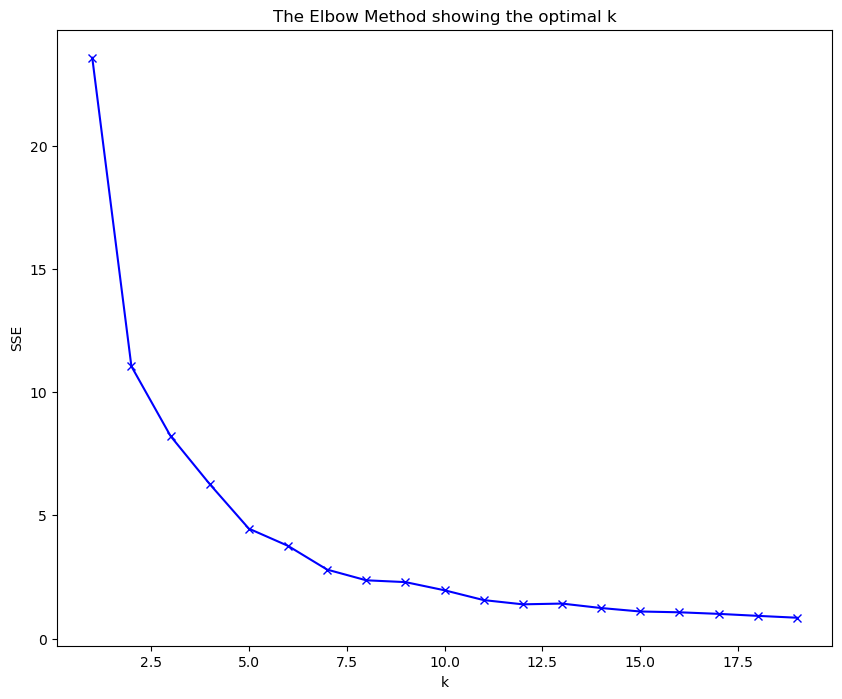

In [73]:

errors = []
#Define an arbitrary range of clusters, K
K = range(1, 20)


for k in K:
    #init KMeans model for each k in K
    kmeanModel = KMeans(n_clusters=k)
    # fit the model to the scaled data
    kmeanModel.fit(df_scaled_mm)

    #append the inertia value to error (euclidian distance between each data point and their assigned clusters centroid) 
    errors.append(kmeanModel.inertia_)

#plotting the 
plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

warnings.filterwarnings('ignore')

In [74]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 12.514353650474844
K=3: 2.8287933317278213
K=4: 1.9477236802668223
K=5: 1.8075444590731076
K=6: 0.6982554170438755
K=7: 0.9635107914564229
K=8: 0.4339957561814458
K=9: 0.07335206567762631
K=10: 0.3317397403953293
K=11: 0.3976906956512103
K=12: 0.17204897252684326
K=13: -0.030745053219796814
K=14: 0.1807196193644358
K=15: 0.14049678810002253
K=16: 0.03238540331415929
K=17: 0.06364744712026549
K=18: 0.0806749860585746
K=19: 0.07587010696372298


We go with K=8, cause improvements seem less pronounced after 8, and there is the slight bump between 7 and 9 indicating we wont be overfitting too much. 
but 6 and 7 could be good to test too

# 2. Visualize the K-Means clustering result for the best K.


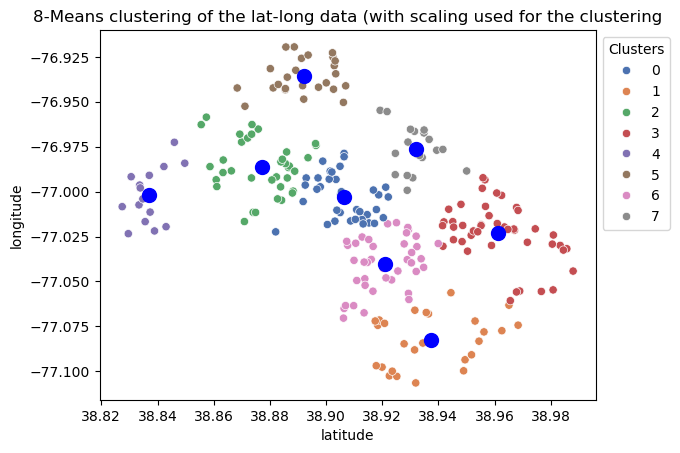

In [75]:
#init the KMeans model for 8 clusters
kmeans_scaled8 = KMeans(n_clusters=8)
#fiting it to the scaled data
kmeans_scaled8.fit(df_scaled_mm)

# add cluster labels to the original DataFrame 
df["8MeansClusterLabel"] = kmeans_scaled8.labels_

# Inverse transforming centroids back into the orignal values (otherwise they'd just be 0-1)
centroids8 = minMaxScaler.inverse_transform(kmeans_scaled8.cluster_centers_)


sns.scatterplot(data = df, x = "latitude", y = "longitude", hue = "8MeansClusterLabel", palette="deep")
plt.scatter(x = centroids8[:,0], y = centroids8[:,1], color='blue', s = 100)
plt.title("8-Means clustering of the lat-long data (with scaling used for the clustering")
plt.legend(title="Clusters", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# 3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.


In [ ]:
#dont really need to do this again as we are doing it all once, and that is actually enough
# df = pd.read_csv('data\\Ch5_bike_station_locations.csv')
# df_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(df), columns=df.columns)

In [ ]:
#Making a func that takes a number of clusters, and type of linkage
def aggClustering(n, link):
    # init and fit
    agg = AgglomerativeClustering(n_clusters=n, linkage=link)
    agg.fit(df_scaled_mm)

    #add cluster label to df for each column
    df["aggCluster{0}".format(n)] = agg.labels_

    plt.figure(figsize=(8, 6))

    sns.scatterplot(data = df, x = "latitude", y = "longitude", hue = "aggCluster{0}".format(n), palette="deep")
    plt.title(f'Agglomative clustering of bike  data with {n} clusters and of type {link}')
    plt.show()

In [ ]:
# no way in hell I am scrolling through all these to visually inspect 9*4 different plots
# There's got to be a better way!!

# for cn in range(9, 0, -1):
#     aggClustering(cn, 'ward')
#     aggClustering(cn, 'complete')
#     aggClustering(cn, 'average')
#     aggClustering(cn, 'single')

In [95]:
# So the better way is looking at four different types of dendograms, one for each linkage method
def plotDendo(df,link):
    plt.figure(figsize=(10, 7))
    plt.title(f"{link} Dendogram")
    dend = shc.dendrogram(shc.linkage(df, method=link))
    plt.show()


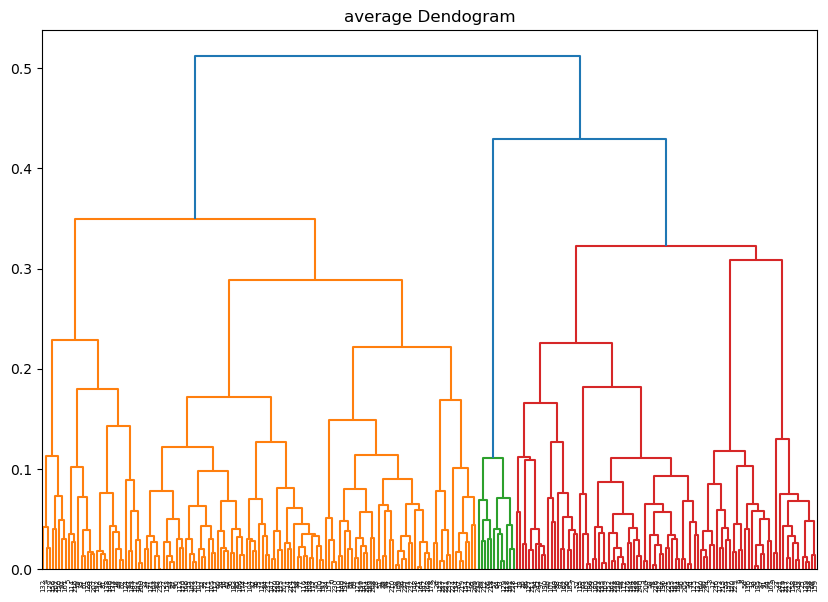

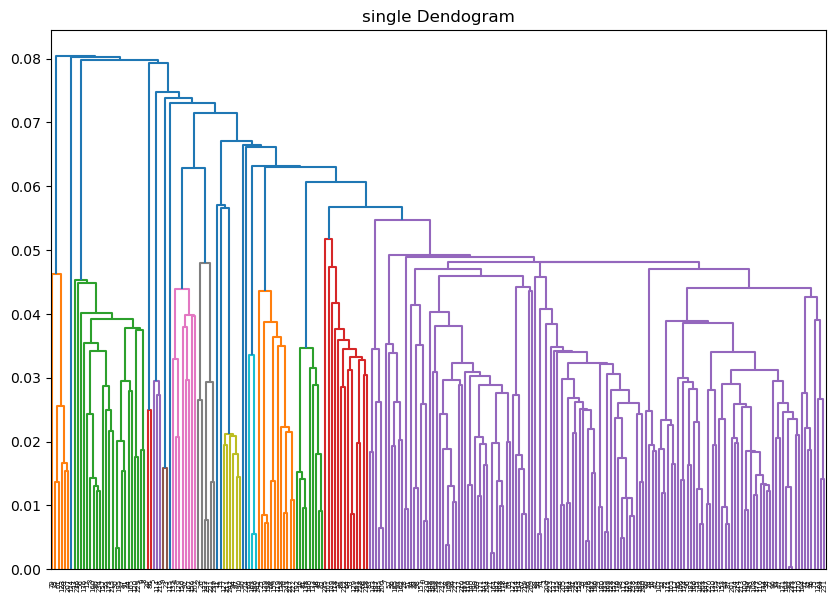

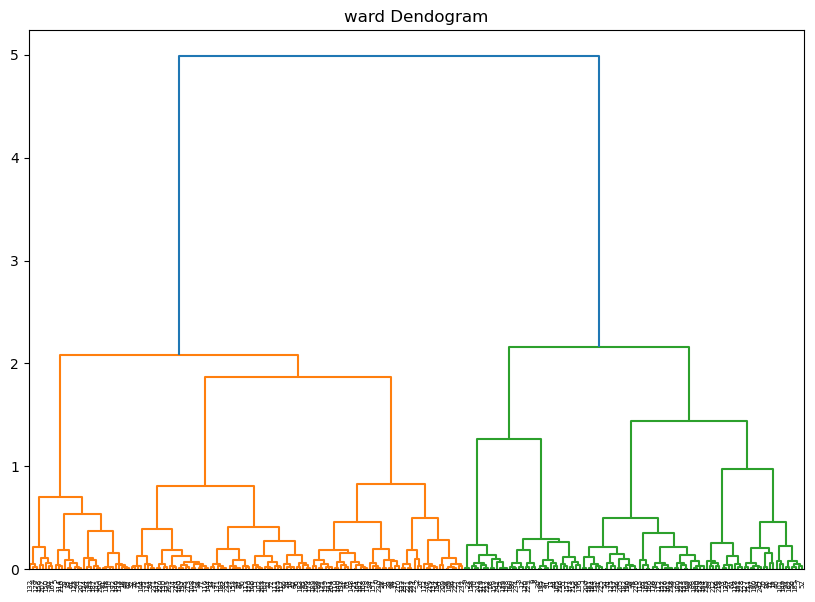

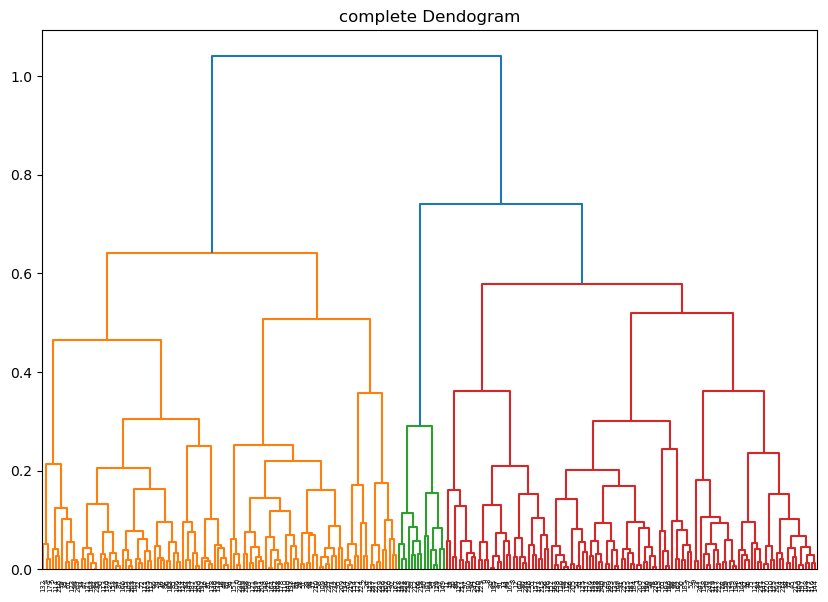

In [97]:
plotDendo(df_scaled_mm, 'average')
plotDendo(df_scaled_mm, 'single')
plotDendo(df_scaled_mm, 'ward')
plotDendo(df_scaled_mm, 'complete')


Average looks good.
cut off at height 0.3 on linkage = average i.e the 4 major branches 

# The better way (Quantitative Measures for evaluation)

In [ ]:



from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr

# Compute the linkage matrix
Z = linkage(df_scaled_mm, method='complete')

# Compute the cophenetic distances
coph_dist = cophenet(Z)

# Compute the original pairwise distances
original_dist = pdist(df_scaled_mm)

# Calculate the cophenetic correlation coefficient
cophenetic_corr, _ = pearsonr(coph_dist, original_dist)
print(f"Cophenetic Correlation Coefficient: {cophenetic_corr}")

Cophenetic Correlation Coefficient: 0.6611782457591184
